In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
from math import exp

In [2]:
#Cargamos los datos

archivo = pd.read_csv('Cardiaca.csv', sep='\t').to_numpy() 




In [3]:

def Normalizar_Datos(archivo):
    meam_data = archivo.mean(axis=0)
    std_data = archivo.std(axis=0)

    normalization_t = archivo - meam_data
    normalization_t = normalization_t / std_data
    
    return normalization_t

dataset=Normalizar_Datos(archivo)
#dataset = np.insert(dataset,0,values=1.0,axis=1)

X_train = archivo[:,:-1] 
y_train = archivo[:,-1]


def Crear_folds(data, k):
    y_train_new = y_train.reshape((y_train.shape[0], 1))
    data[:,-1] =y_train[:]
    ind = np.argsort( data[:,-1] )
    #data=np.delete(data, 0, axis=1)
    
    data = data[ind]
    print(data[4,:])
    print(data[9,:])
    ones_size = np.count_nonzero(data, axis=0)[-1]
    zeros_size = data.shape[0] - ones_size
    Group_1=data[ 0:zeros_size , :]
    Group_2=data[ zeros_size: , :]
    res = list()
    Parts_1 = np.array_split(Group_1, k)
    Parts_2 = np.array_split(Group_2, k)
    for i in range(k):
        temp = np.concatenate((Parts_1[i],Parts_2[i]))
        print(temp[0,:])
        np.random.shuffle(temp)
        res.append(temp)
    return res



folds_Cardiaca=Crear_folds(dataset,3)


print('Cardiaca', folds_Cardiaca[0].shape, folds_Cardiaca[1].shape, folds_Cardiaca[2].shape)
print('\n')


n_features=folds_Cardiaca[0].shape[1]


[ 1.50364073  0.68100522  1.00257707  2.7629074   0.53601107  2.394438
 -1.00583187  0.01544279  1.43548113  0.48345117 -0.64911323 -0.71442887
  1.12302895  0.        ]
[-0.59184697  0.68100522  1.00257707 -0.66386682 -1.12598041 -0.41763453
  0.89896224 -0.46559277 -0.69663055  0.82852939 -0.64911323  2.22410436
  1.12302895  0.        ]
[ 0.29046364 -1.46841752  0.03203122 -0.09273778 -0.19835726 -0.41763453
 -1.00583187  1.0649749  -0.69663055 -0.89686172 -0.64911323  0.26508221
 -0.51292188  0.        ]
[ 0.62133012  0.68100522 -0.93851463 -0.83520553 -0.31431015  2.394438
  0.89896224  0.45274783  1.43548113  0.31091206  0.97635214  1.24459328
  1.12302895  0.        ]
[ 0.9521966   0.68100522 -0.93851463  0.47839125 -1.14530589 -0.41763453
 -1.00583187 -0.24694024  1.43548113  2.55392051  0.97635214  1.24459328
  1.12302895  0.        ]
Cardiaca (101, 14) (101, 14) (101, 14)




In [4]:

def sigmoidal(theta, x):
    theta= np.transpose(theta) 
    z= np.dot(x, theta)
    return 1. / (1 + np.exp(-z))





#Funcion de precision
def accuracy(X_test, y_test, theta):
    y_pred_test = sigmoidal(theta, X_test )
    iters = X_test.shape[0] #tamaño en filas del conjunto de entrenamiento    
    for i in range(iters):
        if(y_pred_test[i]>0.5):
            y_pred_test[i] = 1
        else:
            y_pred_test[i] = 0

    m = y_test.shape[0]
    diferencias =  y_pred_test - y_test
    errores = np.count_nonzero(diferencias)
    return 100*(m-errores)/float(m)
    

In [5]:
alph = 0.5 #ratio de aprendizaje
#iters = 1000 #cantidad de iteraciones
theta = np.zeros(n_features) # inicializar con un vector de ceros 
print('Theta',theta.shape)
print('\n')

def hipotesis(X, theta):
    h_theta = sigmoidal(theta, X) #aplicamos la funcion sigmoidea a h_theta
    return h_theta


def Calcular_func_costo(X,y,theta):
    m = X.shape[0]
    h_theta = sigmoidal(theta, X) #guarda los resultados de la hipotesis h(x), matriz de m filas 
    resultado = - np.dot(y, np.log(h_theta)) - np.dot(1-y ,np.log(1-h_theta))   
    return (1*np.sum(resultado)) / float(m)


def Calcular_Gradiente(X,y,h_theta):
    derivada = h_theta - y # sum[ (h(x)-y)]
    gradiente = np.dot( np.transpose(X) ,derivada )  # sum[ (h(x)-y)*x ]  
    return gradiente
    
    
    
# gradient descent (devuelve theta y un vector de costo de tamaño iters). La función gradiente descendiente llama a la 
# función costo iter veces. Solo puede haber un for para las iteraciones, no un for para los thetas 
def Gradiente_Descente(X,y,theta,iters,alpha):
    costos = np.zeros(iters) #vector de costos para cada iteración
    m = X.shape[0]
    for i in range(iters):
        h_theta = sigmoidal(theta, X) #guarda los resultados de la hipotesis h(x), matriz de m filas
        gradiente=Calcular_Gradiente(X,y,h_theta)
        theta = theta - (gradiente*alpha)
        costos[i] = Calcular_func_costo(X,y,theta)
    return theta, costos

cost=[]
alpha = np.array([0.01, 0.05, 0.1, 0.2, 0.3, 0.4])
k=3
s = 0
sum_acc = 0
acc = np.zeros((7,6),float)
for iters in range(500,4000,500):
    for i in range(len(alpha)):
        precision=[]
        for j in range (3):

            train = np.array([])
            test = np.array([])
            test = folds_Cardiaca[i%k]


            y_test = test[:,-1:]
            X_test = test[:,:-1]
            X_test = np.insert(X_test, 0, 1, axis=1)
            #print(X_test)


            y_train_1 = folds_Cardiaca[(j+2)%k][:,-1:]
            X_train_1 = folds_Cardiaca[(j+2)%k][:,:-1]   
            X_train_1 = np.insert(X_train_1, 0, 1, axis=1)

            y_train_2 = folds_Cardiaca[(j+1)%k][:,-1:]
            X_train_2 = folds_Cardiaca[(j+1)%k][:,:-1]   
            X_train_2 = np.insert(X_train_2, 0, 1, axis=1)

            y_test= y_test[:,0]
            y_train_1= y_train_1[:,0]
            y_train_2= y_train_2[:,0]
            theta1,cost1 = Gradiente_Descente(X_train_1,y_train_1,theta,iters,alpha[i])
            theta2,cost2 = Gradiente_Descente(X_train_2,y_train_2,theta,iters,alpha[i])
            cost.append((cost1+cost2) /2)
            precision.append(accuracy( X_test, y_test, theta1 ))
            acc[s,i]=np.array(precision).mean()
            precision=[]
    s=s+1
print("Conjunto de Datos: ")
fils = [" 500", "1000", "1500", "2000", "2500", "3000", "3500"]
cols = ["α: 0.01", "α: 0.05", "α: 0.1", "α: 0.2", "α: 0.3", "α: 0.4"]
df = pd.DataFrame(acc, columns=cols, index=fils)
df        








Theta (14,)




C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


Conjunto de Datos: 


,α: 0.01,α: 0.05,α: 0.1,α: 0.2,α: 0.3,α: 0.4
500,86.138614,85.148515,78.217822,71.287129,81.188119,73.267327
1000,86.138614,85.148515,78.217822,71.287129,81.188119,73.267327
1500,86.138614,85.148515,78.217822,71.287129,81.188119,73.267327
2000,86.138614,85.148515,78.217822,71.287129,81.188119,73.267327
2500,86.138614,85.148515,78.217822,71.287129,81.188119,73.267327
3000,86.138614,85.148515,78.217822,71.287129,81.188119,73.267327
3500,86.138614,85.148515,78.217822,71.287129,81.188119,73.267327


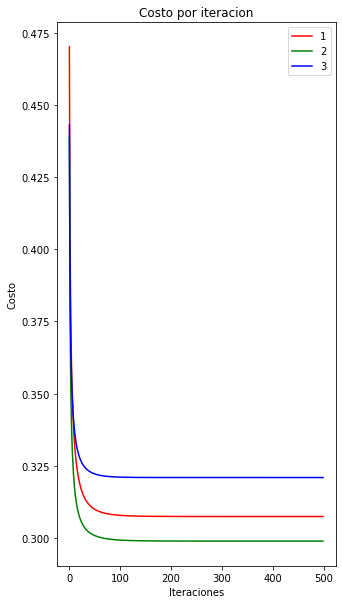

In [6]:
from pylab import rcParams
rcParams['figure.figsize'] = 5, 10


#plot the cost
plt.plot(np.arange(cost[0].shape[0]),cost[0], 'r', label='1')
plt.plot(np.arange(cost[1].shape[0]),cost[1], 'g', label='2')
plt.plot(np.arange(cost[2].shape[0]),cost[2], 'b', label='3')
plt.title('Costo por iteracion')
plt.xlabel('Iteraciones')
plt.ylabel('Costo')
plt.legend()
plt.show()
